<a href="https://colab.research.google.com/github/mrella/finance_colab/blob/main/drawdown_medio_tickers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargando datos...


<ipython-input-7-744672633>:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(sp500_tickers, start="2024-10-01", end="2025-06-15")['Close']
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-10-01 -> 2025-06-15)')


Calculando drawdowns...


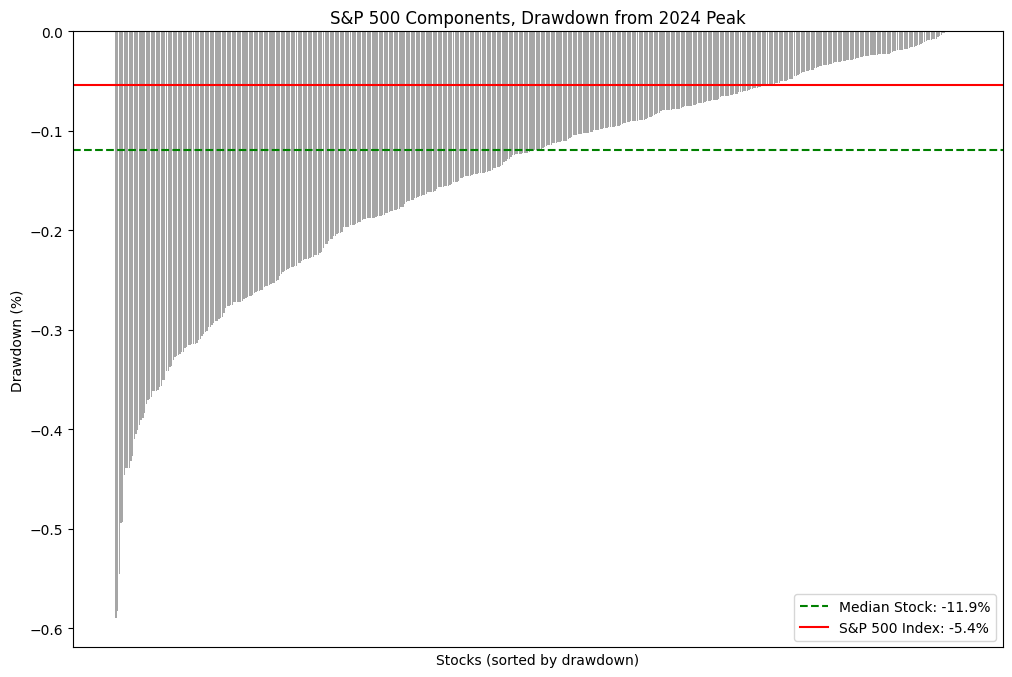

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la lista de tickers del S&P 500
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Descargar datos históricos para todos los tickers
print("Descargando datos...")
data = yf.download(sp500_tickers, start="2024-10-01", end="2025-06-15")['Close']

# Crear un DataFrame para almacenar los resultados
drawdowns = []

# Calcular drawdown para cada ticker
print("Calculando drawdowns...")
for ticker in sp500_tickers:
    if ticker in data.columns:
        stock_data = data[ticker].dropna()

        if not stock_data.empty:
            # Pico más alto en 2024
            max_price = stock_data.max()

            # Precio más reciente
            latest_price = stock_data.iloc[-1]

            # Calcular drawdown
            drawdown = (latest_price - max_price) / max_price
            drawdowns.append({'Ticker': ticker, 'Drawdown': drawdown})

# Crear DataFrame con los drawdowns
drawdown_df = pd.DataFrame(drawdowns).sort_values(by='Drawdown')

# Calcular la mediana y el índice S&P 500
median_drawdown = drawdown_df['Drawdown'].median()
sp500_drawdown = (data.mean(axis=1).iloc[-1] - data.mean(axis=1).max()) / data.mean(axis=1).max()

# Graficar
plt.figure(figsize=(12, 8))
plt.bar(range(len(drawdown_df)), drawdown_df['Drawdown'], color='gray', alpha=0.7)
plt.axhline(y=median_drawdown, color='green', linestyle='--', label=f'Median Stock: {median_drawdown:.1%}')
plt.axhline(y=sp500_drawdown, color='red', linestyle='-', label=f'S&P 500 Index: {sp500_drawdown:.1%}')

# Añadir etiquetas y título
plt.title('S&P 500 Components, Drawdown from 2024 Peak')
plt.ylabel('Drawdown (%)')
plt.xlabel('Stocks (sorted by drawdown)')
plt.xticks([], [])  # Ocultar los nombres de los tickers en el eje x
plt.legend()
plt.show()

In [2]:
!pip install yfinance #--upgrade yfinance==0.2.54
!pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 131.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp311-cp311-linux_x86_64.whl size=886605 sha256=286ae7ecdfeca52645f4ed124ed11a7a491ee213b257563107685a1f3cbd1833
  Stored in directory: /root/.cache/pip/wheels/25/cb/79/a133a0d1d75f318a96614ed7fb97bdf2f35a7b6c4d4e426e3f
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.1 MB/s eta 0:00:00


In [ ]:
# @title

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Descargar datos históricos del S&P 500
print("Descargando datos...")
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
data = yf.download(sp500_tickers, start="2023-01-01", end="2025-01-01")['Adj Close']

# Configurar variables para la animación
window_size = 365  # Ventana de días anteriores para calcular drawdowns
dates = data.index  # Fechas disponibles
drawdowns_history = []

# Precalcular drawdowns para cada fecha
print("Calculando drawdowns...")
for i in range(window_size, len(dates)):
    current_date = dates[i]
    window_data = data.iloc[i - window_size:i]
    drawdowns = []

    for ticker in data.columns:
        if ticker in window_data:
            stock_data = window_data[ticker].dropna()

            if not stock_data.empty:
                max_price = stock_data.max()
                latest_price = stock_data.iloc[-1]
                drawdown = (latest_price - max_price) / max_price if max_price > 0 else 0
                drawdowns.append(drawdown)

    # Almacenar drawdowns del día actual
    median_drawdown = pd.Series(drawdowns).median()
    drawdowns_history.append((current_date, sorted(drawdowns), median_drawdown))

print (drawdowns_history)

# Función para actualizar cada frame en la animación
def update(frame):
    plt.clf()  # Limpiar el gráfico
    current_date, drawdowns, median_drawdown = drawdowns_history[frame]
    plt.bar(range(len(drawdowns)), drawdowns, color='gray', alpha=0.7)
    plt.axhline(y=median_drawdown, color='green', linestyle='--', label=f'Median Stock: {median_drawdown:.1%}')

    # Configurar el título y etiquetas
    plt.title(f'S&P 500 Drawdowns as of {current_date.strftime("%Y-%m-%d")}')
    plt.ylabel('Drawdown (%)')
    plt.xlabel('Stocks (sorted by drawdown)')
    plt.xticks([], [])  # Ocultar nombres de acciones
    plt.legend()




# Crear la animación
fig = plt.figure(figsize=(12, 8))
ani = FuncAnimation(fig, update, frames=len(drawdowns_history), repeat=False)

# Guardar como GIF o video
print("Generando animación...")
#ani.save('sp500_drawdowns.gif', writer='imagemagick', fps=10)
ani.save('sp500_drawdowns.mp4', writer='ffmpeg', fps=10)
print("Animación completada y guardada como sp500_drawdowns.gif.")

Descargando datos...
YF.download() has changed argument auto_adjust default to True


[                       1%                       ]  5 of 503 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*                      3%                       ]  14 of 503 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 8
[**                     4%                       ]  19 of 503 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**                     4%                       ]  21 of 503 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**                     5%                       ]  23 of 503 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 

Descargando datos de los tickers ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CM

<ipython-input-39-4190180148>:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(sp500_tickers, start=fecha_inicio, end=fecha_fin)['Close']
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-01-01 -> 2025-06-15)')
<ipython-input-39-4190180148>:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_index = yf.download(indice, start=fecha_inicio, end=fecha_fin)['Close']
[*********************100%***********************]  1 of 1 completed
<ipython-input-39-4190180148>:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  index_drawdown = float(( data_index.iloc[i]-data_index.ilo

Calculando drawdowns...


<ipython-input-39-4190180148>:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  index_drawdown = float(( data_index.iloc[i]-data_index.iloc[1]) /  data_index.iloc[1])
<ipython-input-39-4190180148>:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  index_drawdown = float(( data_index.iloc[i]-data_index.iloc[1]) /  data_index.iloc[1])
<ipython-input-39-4190180148>:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  index_drawdown = float(( data_index.iloc[i]-data_index.iloc[1]) /  data_index.iloc[1])
<ipython-input-39-4190180148>:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  index_drawdown = float(

Generando animación SPY ...
Animación SPY completada...


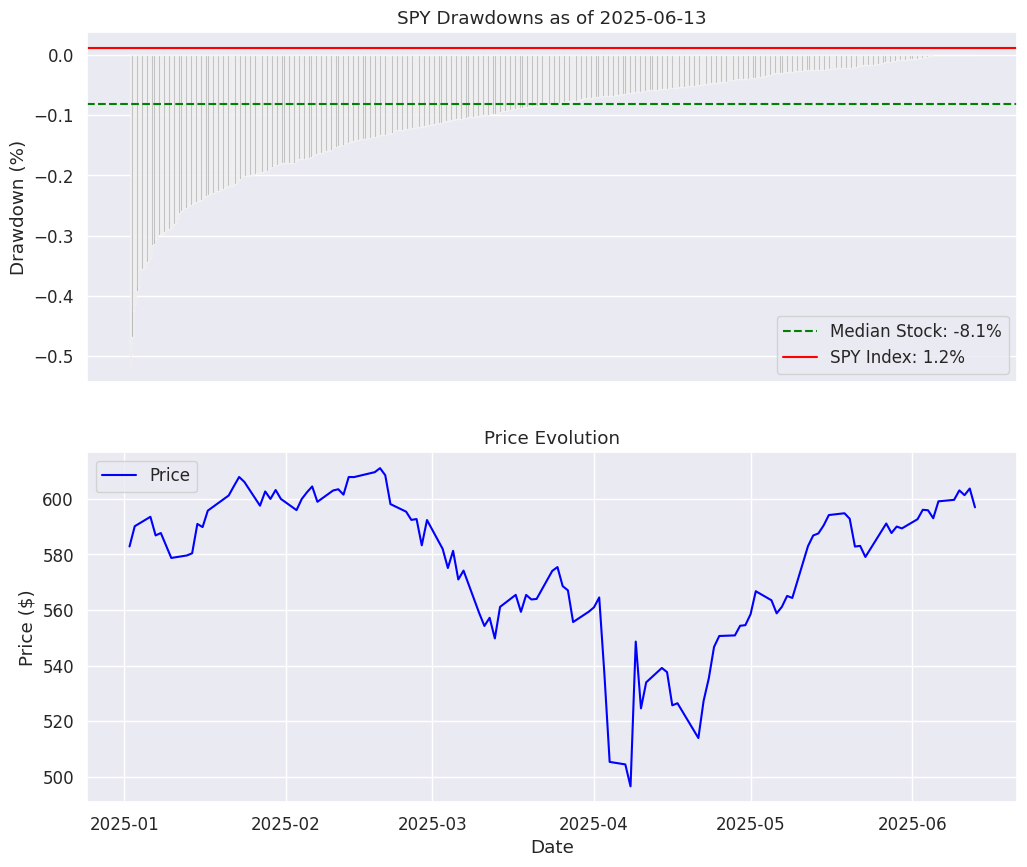

In [39]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
sns.set_theme(style="darkgrid", palette="muted", font_scale=1.1)


def drawdown_medio_tickers_video(tickers, fecha_inicio, fecha_fin, titulo, indice):

  print(f"Descargando datos de los tickers {tickers}...")
  data = yf.download(tickers, start=fecha_inicio, end=fecha_fin)['Close']
  data_index = yf.download(indice, start=fecha_inicio, end=fecha_fin)['Close']

  # Configurar variables para la animación
  #window_size = 3*22 # Ventana de días anteriores para calcular drawdowns

  dates = data.index  # Fechas disponibles
  drawdowns_history = []

  # Precalcular drawdowns para cada fecha
  print("Calculando drawdowns...")
  for i in range(len(dates)):
      current_date = dates[i]
      window_data = data.iloc[0:i]
      drawdowns = []

      for ticker in data.columns:
          if ticker in window_data:
              stock_data = window_data[ticker].dropna()

              if not stock_data.empty:
                  max_price = stock_data.max()
                  latest_price = stock_data.iloc[-1]
                  drawdown = (latest_price - max_price) / max_price if max_price > 0 else 0
                  drawdowns.append(drawdown)

      # Almacenar drawdowns del día actual
      median_drawdown = pd.Series(drawdowns).median()
      up_to_date = data_index.loc[:current_date]
      #print(median_drawdown)
      #index_drawdown = (data.mean(axis=1).iloc[-1] - data_index.mean(axis=1).max()) / data_index.mean(axis=1).max()
      index_drawdown = float(( data_index.iloc[i]-data_index.iloc[1]) /  data_index.iloc[1])
      #print(index_drawdown)

      drawdowns_history.append((current_date, sorted(drawdowns), median_drawdown, up_to_date , index_drawdown))

  #print (drawdowns_history)

  # Función para actualizar cada frame en la animación
  def update(frame):
      # Limpiar la figura completa antes de actualizar
      fig.clear()

      # Obtener los datos para el frame actual
      current_date, drawdowns, median_drawdown, up_to_date, index_drawdown = drawdowns_history[frame]

      # Crear subgráfico 1: Drawdowns
      ax1 = fig.add_subplot(2, 1, 1)
      ax1.bar(range(len(drawdowns)), drawdowns, color='gray', alpha=0.7)
      ax1.axhline(y=median_drawdown, color='green', linestyle='--', label=f'Median Stock: {median_drawdown:.1%}')
      ax1.axhline(y=index_drawdown, color='red', linestyle='-', label=f'{titulo} Index: {index_drawdown:.1%}')
      ax1.set_title(f'{titulo} Drawdowns as of {current_date.strftime("%Y-%m-%d")}')
      ax1.set_ylabel('Drawdown (%)')
      ax1.set_xticks([])  # Ocultar nombres de acciones
      ax1.legend()

      # Crear subgráfico 2: Precio del SPY
      ax2 = fig.add_subplot(2, 1, 2)
      ax2.plot(up_to_date.index, up_to_date.values, color='blue', label='Price')
      ax2.set_title('Price Evolution')
      ax2.set_ylabel('Price ($)')
      ax2.set_xlabel('Date')
      ax2.legend()


  # Crear la figura para la animación
  fig = plt.figure(figsize=(12, 10))

  # Crear la animación
  ani = FuncAnimation(fig, update, frames=len(drawdowns_history), repeat=False)

  # Guardar como video
  print(f"Generando animación {titulo} ...")
  ani.save(f"{titulo}_drawdowns.mp4", writer='ffmpeg', fps=1)
  print(f"Animación {titulo} completada...")



#parametros iniciales
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
fecha_inicio = "2025-01-01"
fecha_fin = "2025-06-15"
titulo = "SPY"
indice = "SPY"
drawdown_medio_tickers_video(tickers, fecha_inicio, fecha_fin, titulo, indice)
